# Name : Rohit Kulkarni USC ID : 5402749044

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import variation
from heapq import nlargest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn import linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


Reading communities data

In [2]:
data = pd.read_csv('communities.data',na_values='?',names=["state","county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"])

1.b) Using data imputation to fill missing values and removing features which are nonpredictive

In [3]:
data = data.drop(['state','county','community','communityname','fold'], axis=1)
data=data.replace('?',np.NaN)
data.fillna(data.mean(), inplace=True)

Train and Test data

In [4]:
Training_data = data.iloc[0:1495]
Test_data=data.iloc[1495:]
predictors_data_goal = data.iloc[:,-1]
predictors_data_goal = predictors_data_goal.to_frame()
predictor_y_train = predictors_data_goal.iloc[:1495,:]
predictor_y_test = predictors_data_goal.iloc[1495:,:]

1.c) Correlation matrix for training and test set

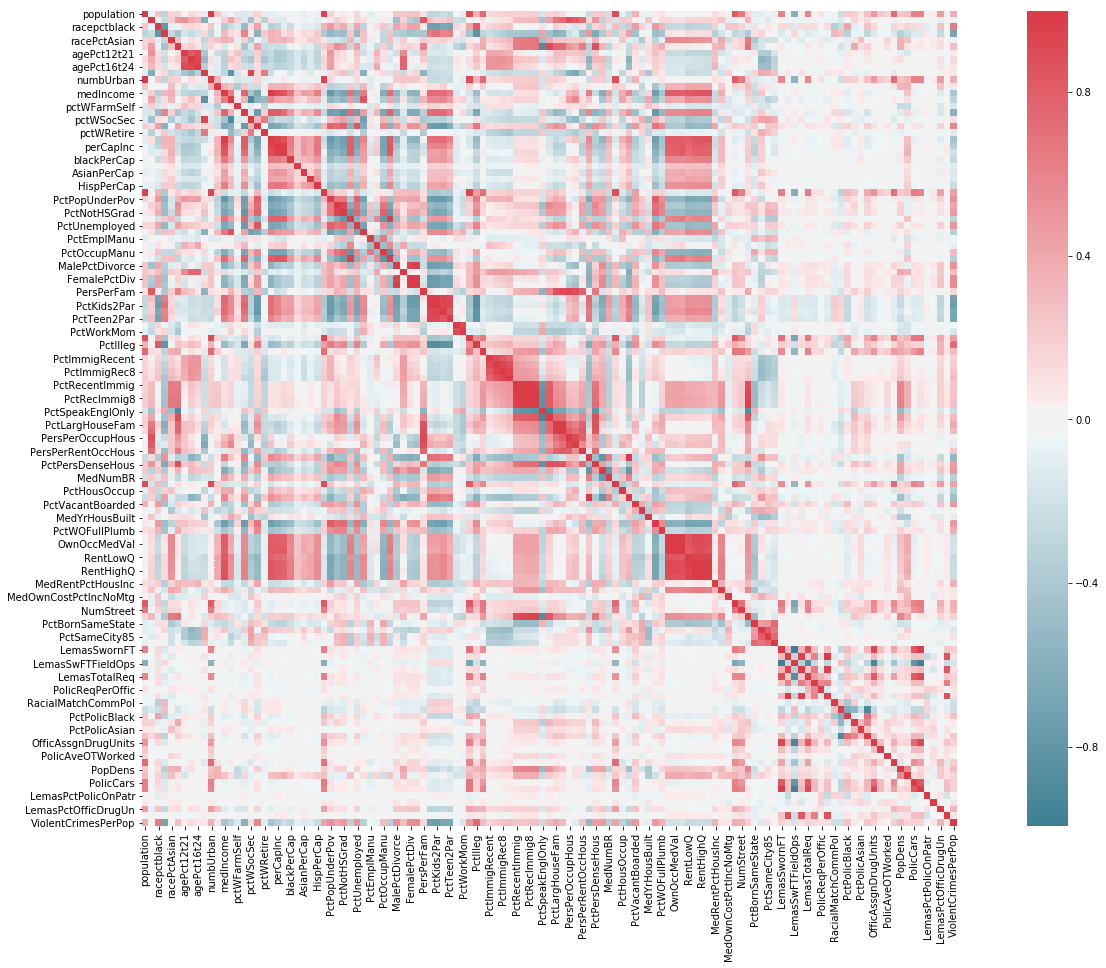

In [5]:
f, ax = plt.subplots(figsize=(25, 15))
corr = Training_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

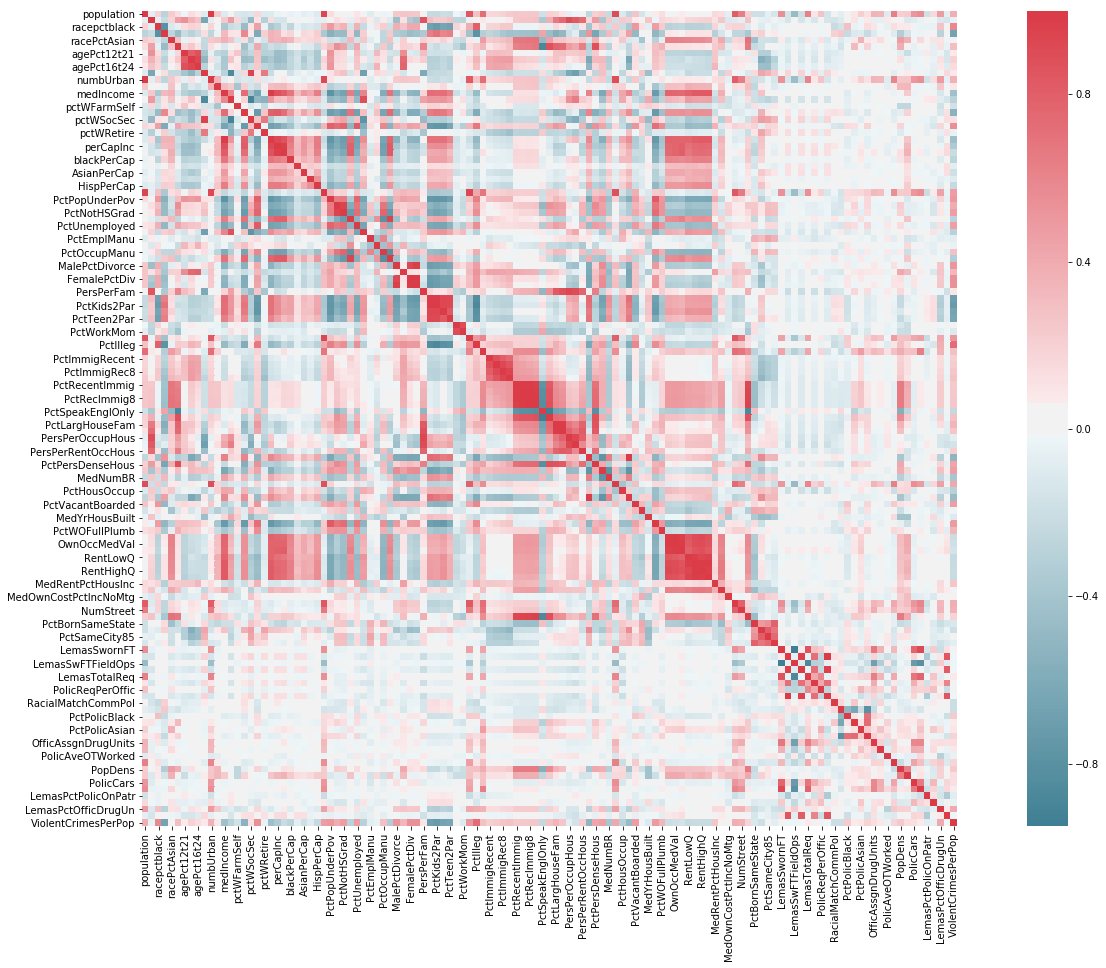

In [6]:
f, ax = plt.subplots(figsize=(25, 15))
corr = Test_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

1.d) Coefficient of Variation CV for each feature for training and test data

In [7]:
Training_CV=pd.DataFrame(columns=Training_data.columns)
array2=[]
Training_dict={}
for i in range(0,123):
    feature=Training_data.iloc[:,i].std()/Training_data.iloc[:,i].mean()
    array2 = np.append(array2,feature)
    Training_dict.update({Training_data.columns[i]:feature})
Training_CV= Training_CV.append(pd.Series(list(array2),index=Training_data.columns),ignore_index=True)    

In [8]:
Training_CV

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,2.241105,0.3558,1.428885,0.330213,1.3591,1.612091,0.369083,0.291315,0.50031,0.412776,...,1.645408,0.864499,1.39711,0.539823,0.774344,0.117988,0.371002,2.552946,0.320035,0.987909


In [9]:
Test_CV=pd.DataFrame(columns=Test_data.columns)
array2=[]
Test_dict={}
for i in range(0,123):
    feature=Test_data.iloc[:,i].std()/Test_data.iloc[:,i].mean()
    array2 = np.append(array2,feature)
    Test_dict.update({Test_data.columns[i]:feature})
Test_CV= Test_CV.append(pd.Series(list(array2),index=Test_data.columns),ignore_index=True)    

In [10]:
Test_CV

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,2.077145,0.346017,1.356525,0.304182,1.360714,1.622216,0.356343,0.288878,0.480111,0.454808,...,1.758711,0.89624,1.479509,0.482417,0.565815,0.134441,0.358745,2.563248,0.383252,0.948676


1.e) 11 features with highest CV for both training set and test set

In [11]:
Train_11={key: value for key,value in Training_dict.items() if value in nlargest(11,Training_dict.values())}
Test_11={key: value for key,value in Test_dict.items() if value in nlargest(11,Test_dict.values())}

In [12]:
Train_11

{'population': 2.2411046245803745,
 'racePctHisp': 1.612091005228411,
 'numbUrban': 2.0384614919156445,
 'NumUnderPov': 2.3424431162181505,
 'NumIlleg': 3.0589643472092356,
 'NumImmig': 2.9266352462888148,
 'HousVacant': 1.9684670491351257,
 'NumInShelters': 3.470952139705214,
 'NumStreet': 4.292922989491593,
 'LandArea': 1.6454078602149063,
 'LemasPctOfficDrugUn': 2.552945511727576}

In [13]:
Test_11

{'population': 2.0771450949119687,
 'racePctHisp': 1.6222157248397688,
 'numbUrban': 1.8792266468028023,
 'NumUnderPov': 2.1530367486954023,
 'NumIlleg': 2.729758056633798,
 'NumImmig': 2.803986484258142,
 'HousVacant': 1.9321407334264848,
 'NumInShelters': 3.5334392704842097,
 'NumStreet': 4.761101784255363,
 'LandArea': 1.7587114847016307,
 'LemasPctOfficDrugUn': 2.563247519271469}

Scatter plot for 11 features selected from CV for training data

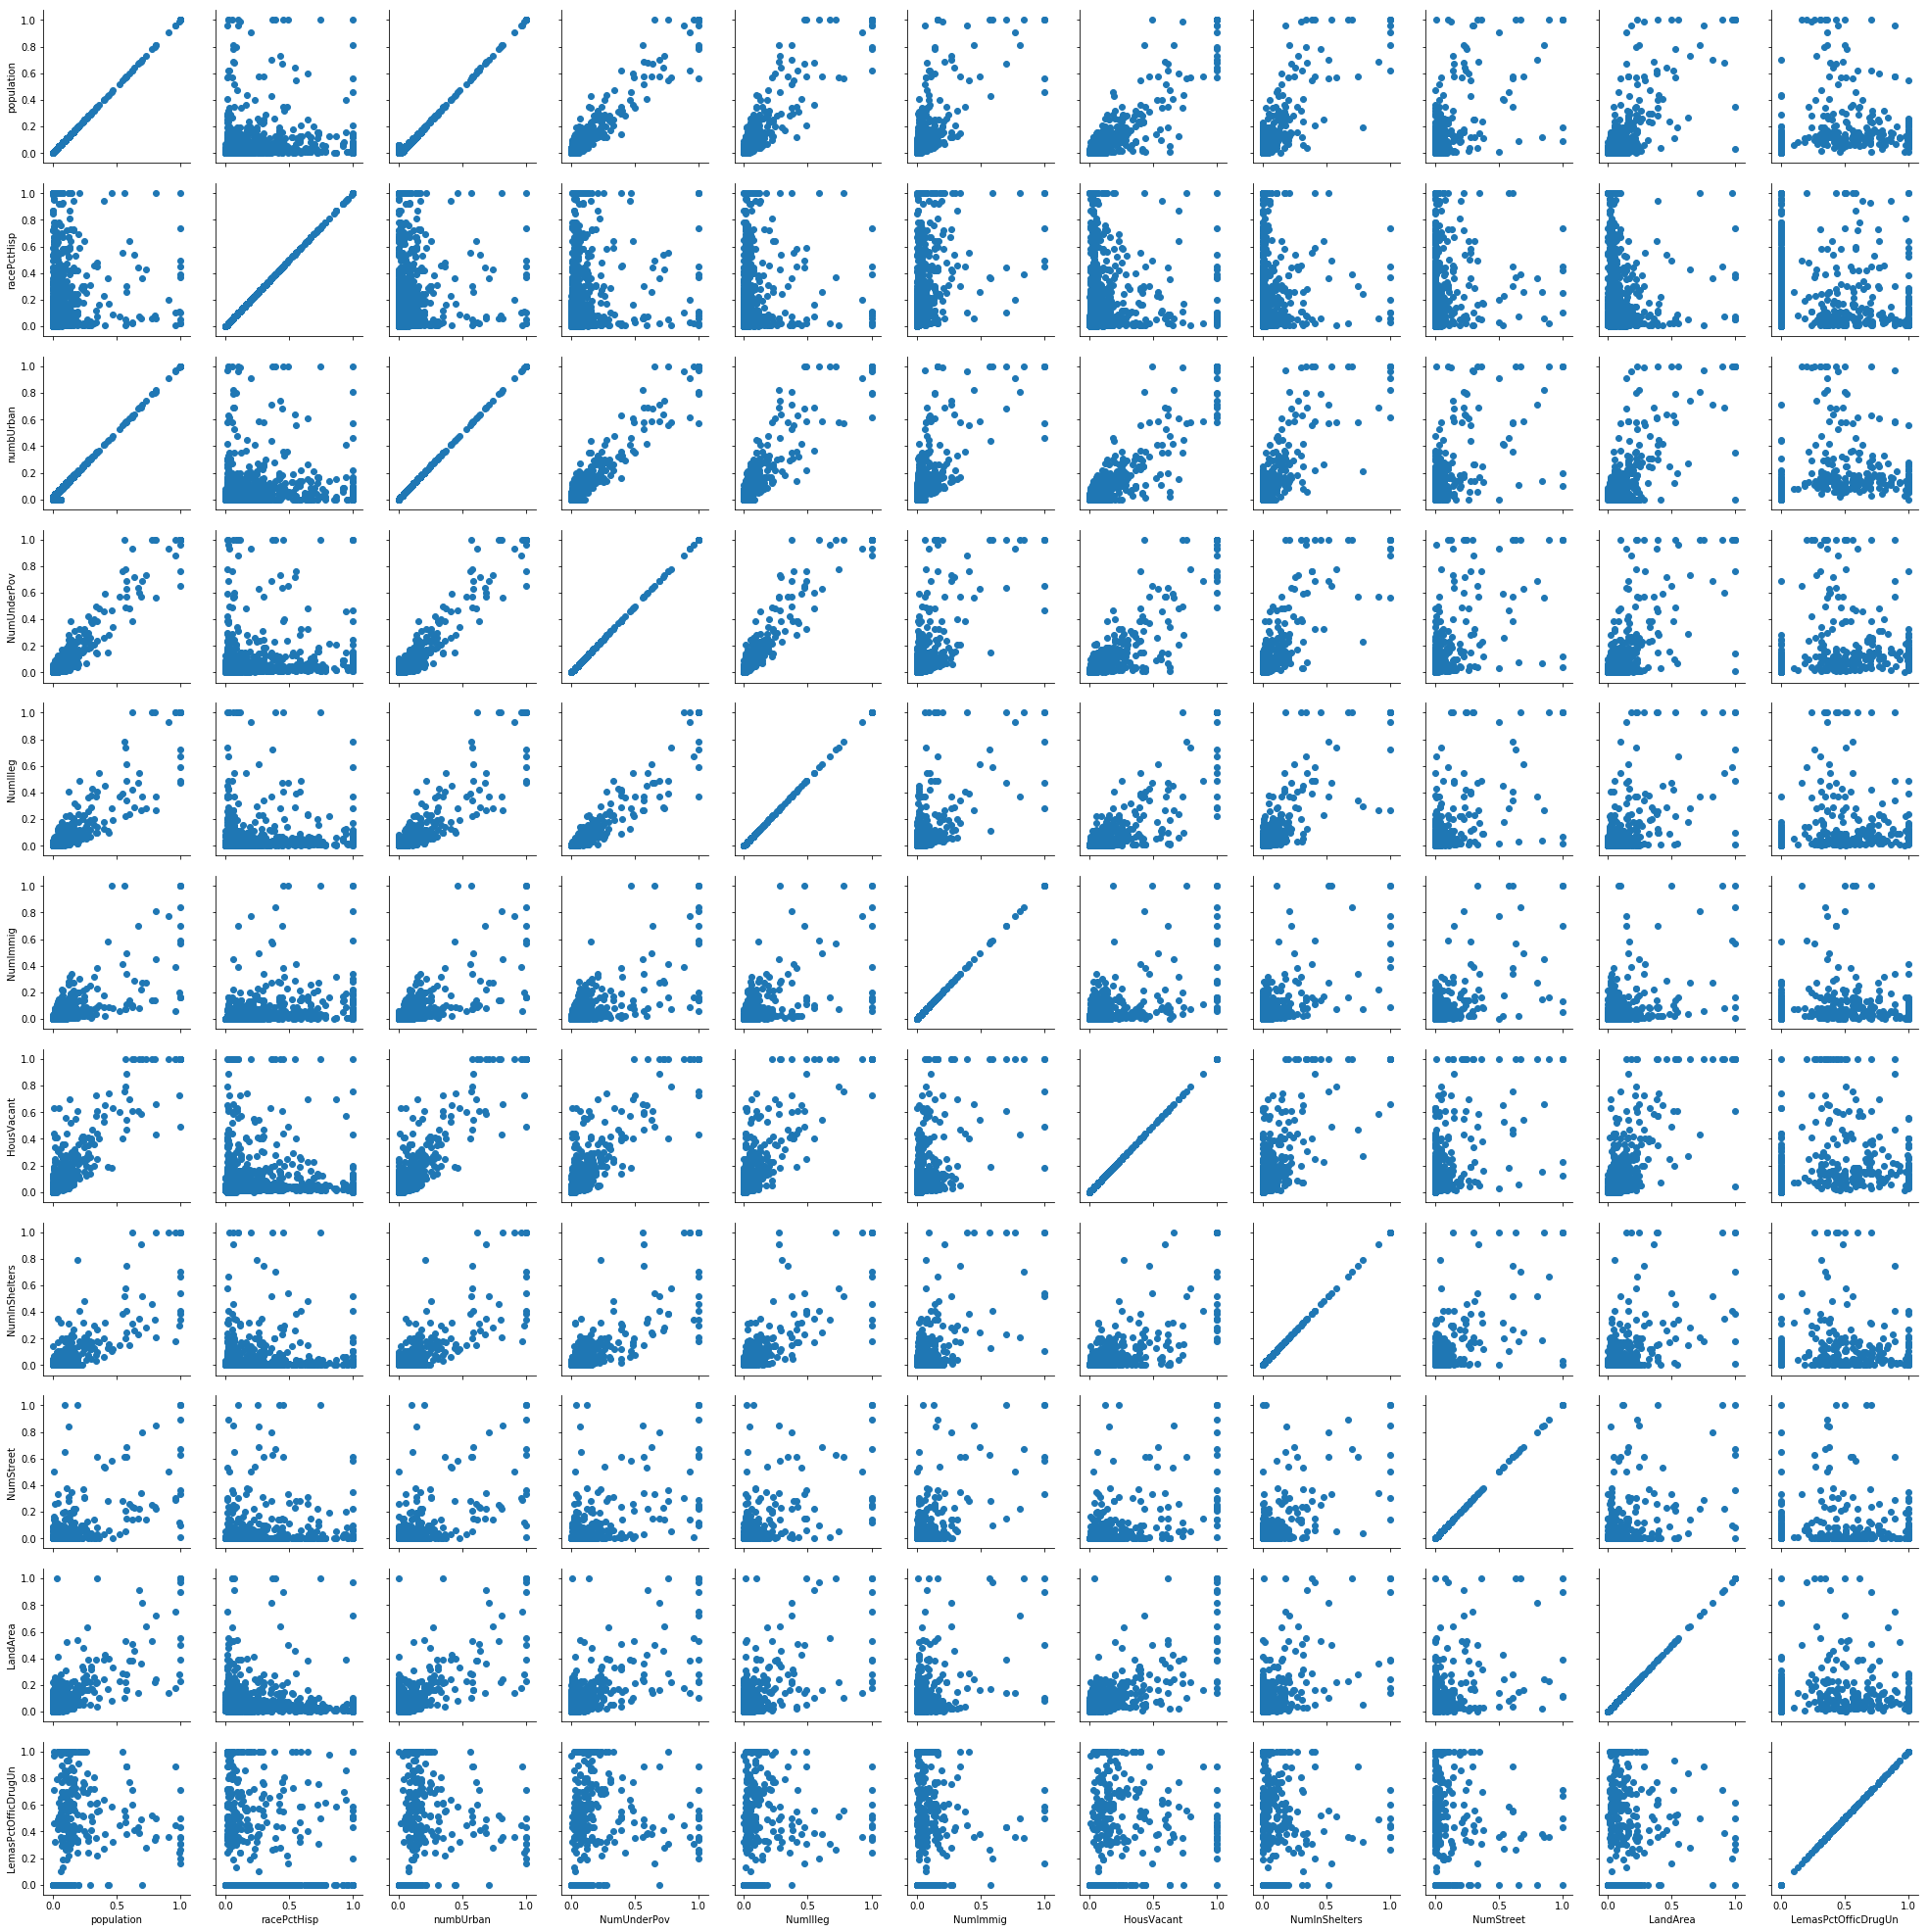

In [14]:
cols=['population', 'racePctHisp',
 'numbUrban', 'NumUnderPov',
 'NumIlleg', 'NumImmig',
 'HousVacant', 'NumInShelters',
 'NumStreet', 'LandArea', 'LemasPctOfficDrugUn']
set1 = Training_data[cols]
g = sns.PairGrid(set1)
g = g.map(plt.scatter)

Scatter plot for 11 features selected from CV for test data

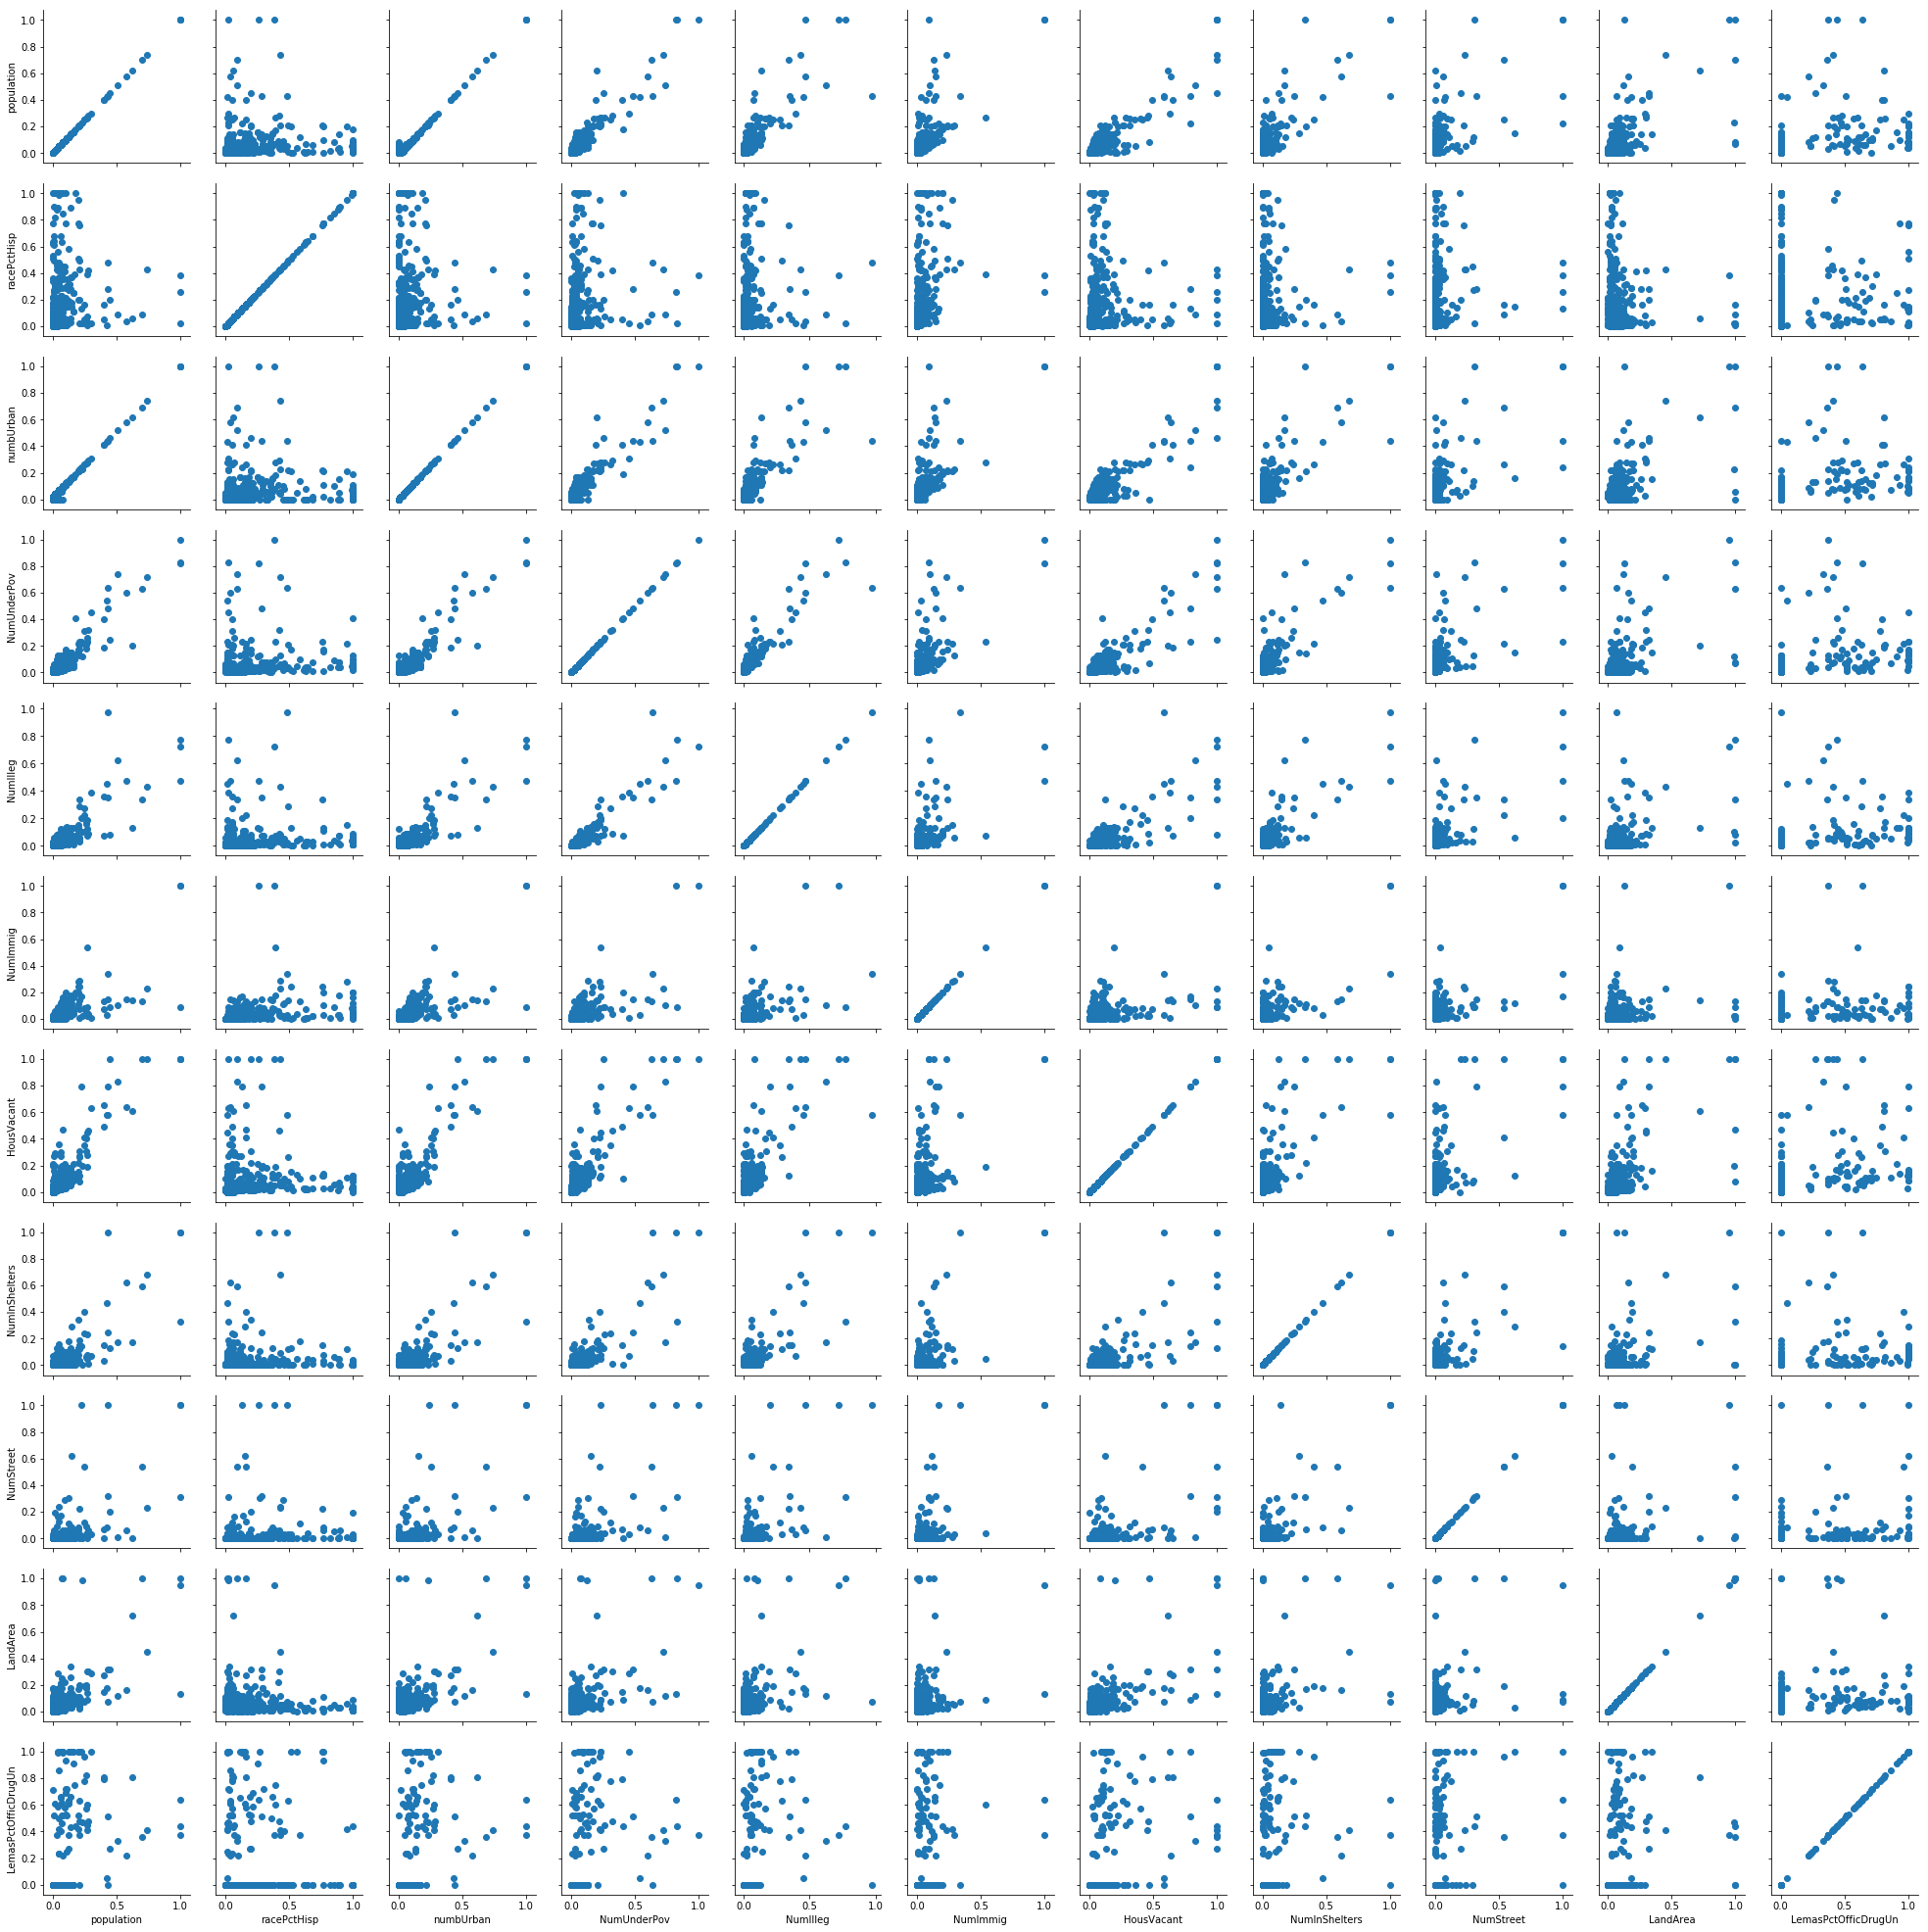

In [15]:
cols=['population', 'racePctHisp',
 'numbUrban', 'NumUnderPov',
 'NumIlleg', 'NumImmig',
 'HousVacant', 'NumInShelters',
 'NumStreet', 'LandArea', 'LemasPctOfficDrugUn']
set1 = Test_data[cols]
g = sns.PairGrid(set1)
g = g.map(plt.scatter)

Box plot for 11 features selected from CV for training data

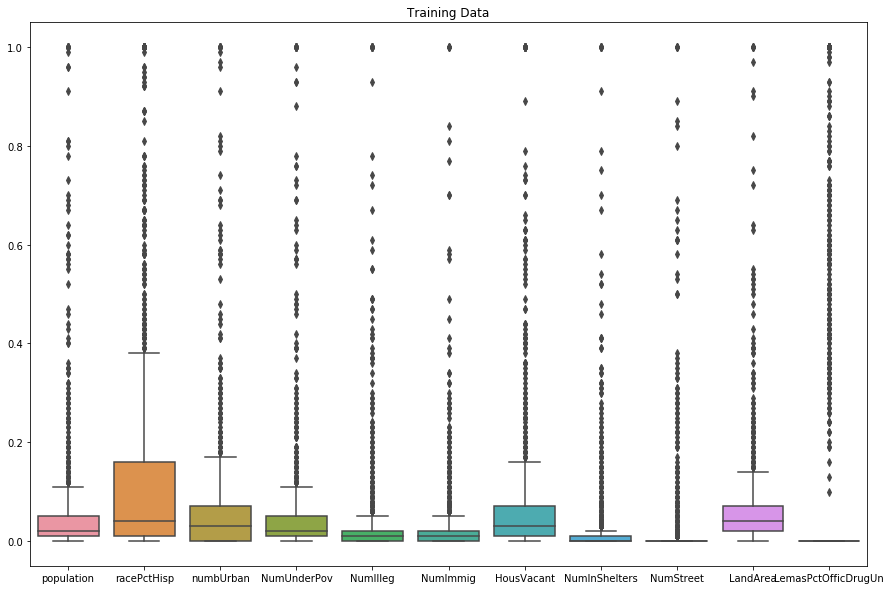

In [16]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cols=cols=['population', 'racePctHisp',
 'numbUrban', 'NumUnderPov',
 'NumIlleg', 'NumImmig',
 'HousVacant', 'NumInShelters',
 'NumStreet', 'LandArea', 'LemasPctOfficDrugUn']
set1 = Training_data[cols]
xticklablesNV = cols=['population', 'racePctHisp',
 'numbUrban', 'NumUnderPov',
 'NumIlleg', 'NumImmig',
 'HousVacant', 'NumInShelters',
 'NumStreet', 'LandArea', 'LemasPctOfficDrugUn']
sns.boxplot(data=set1)
ax.set(title="Training Data")
ax.set_xticklabels(xticklablesNV)
plt.show()

Box plot for 11 features selected from CV for test data

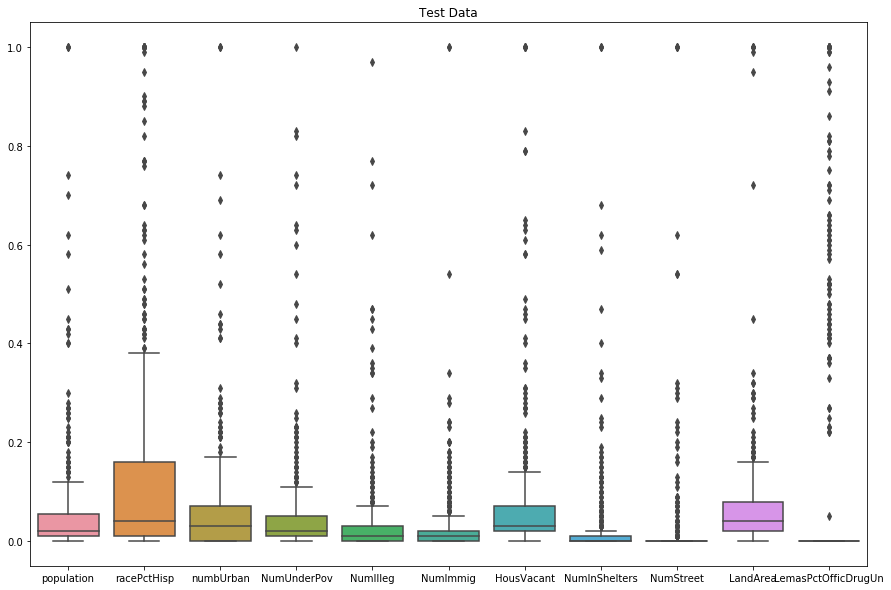

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cols=cols=['population', 'racePctHisp',
 'numbUrban', 'NumUnderPov',
 'NumIlleg', 'NumImmig',
 'HousVacant', 'NumInShelters',
 'NumStreet', 'LandArea', 'LemasPctOfficDrugUn']
set1 = Test_data[cols]
xticklablesNV = cols=['population', 'racePctHisp',
 'numbUrban', 'NumUnderPov',
 'NumIlleg', 'NumImmig',
 'HousVacant', 'NumInShelters',
 'NumStreet', 'LandArea', 'LemasPctOfficDrugUn']
sns.boxplot(data=set1)
ax.set(title="Test Data")
ax.set_xticklabels(xticklablesNV)
plt.show()

1.f) Linear model

In [18]:
lr = LinearRegression()
x_train = Training_data.iloc[:,:-1]
y_train = predictor_y_train
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

1.g) Ridge regression model with lambda chosen by cross validation

In [19]:
x_test = Test_data.iloc[:,:-1]
y_test = predictor_y_test
y_pred =lr.predict(x_test)
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients: 
 [[ 2.13143761e-02 -1.89271223e-02  2.78983299e-01  3.89685109e-03
  -2.93051530e-02  1.10497574e-02  1.75324626e-01 -3.45012797e-01
  -1.19751657e-01  5.61381476e-02 -1.82301243e-01  4.99625643e-02
  -1.71644327e-01 -1.37297267e-01  4.54779925e-02 -2.08226531e-01
   1.37417835e-01  6.15660474e-02 -1.23869637e-01  3.06028422e-01
  -4.45852418e-02 -1.96920314e-01 -3.96805409e-02 -4.33613714e-02
   2.98970048e-02  3.09714952e-02  3.24953633e-02  8.88745268e-02
  -2.10272096e-01 -5.15589445e-02  2.18042489e-02  9.98632456e-02
   2.31875943e-02  2.90526319e-01 -4.62717180e-02 -9.71560865e-03
   5.93142880e-02  5.88516592e-02  5.25623723e-01  2.44825078e-01
   1.84319457e-01 -6.80295252e-01 -1.11274746e-01 -4.04617684e-02
  -2.05636221e-01 -1.70293272e-02 -1.49037221e-02  5.42928899e-02
  -2.05649712e-01 -1.17116758e-01  6.36193074e-02 -1.63658775e-01
   5.12562745e-03  2.81435050e-02 -7.23858488e-04 -2.67532758e-02
  -7.62234260e-02 -2.69472809e-02  9.14541909e-02  3.6703422

In [20]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(x_train, y_train)
print(str(ridgecv.alpha_))

0.0466301673441609


In [21]:
reg = linear_model.Ridge(alpha = ridgecv.alpha_)
reg.fit(x_train,y_train) 

Ridge(alpha=0.0466301673441609, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [22]:
print(str(reg.coef_))

[[-0.04077452 -0.01668977  0.28501796  0.00911114 -0.02737643  0.01862504
   0.16483167 -0.3428528  -0.11222297  0.05206098 -0.08757362  0.04719112
  -0.1033941  -0.13665633  0.04533881 -0.19354963  0.13100954  0.06068982
  -0.12225709  0.24464891 -0.03901445 -0.20359898 -0.03869227 -0.04182225
   0.02976266  0.03025251  0.03163524  0.05579698 -0.19889279 -0.06550446
   0.03714833  0.09745029  0.0193682   0.28506243 -0.04739365 -0.01374812
   0.06129166  0.05594509  0.34352763  0.24697165 -0.03163303 -0.30385776
  -0.06907883 -0.03650568 -0.20041145 -0.01817829 -0.02101236  0.05066349
  -0.20345933 -0.10006477  0.0683127  -0.12826298  0.00365858  0.02337131
   0.00484926 -0.02781476 -0.0596613  -0.01004518  0.04821084  0.05439776
  -0.03557448 -0.18473322  0.05231708 -0.24000254  0.48294691 -0.08651599
  -0.17416497 -0.51949951  0.29322348  0.11657756  0.02657123  0.17591443
  -0.0470502   0.38907238  0.08426971 -0.08877788 -0.02870453  0.03403532
  -0.03695785 -0.29509885  0.3181245  

In [23]:
y_pred = reg.predict(x_test)
mse = np.mean((y_pred - y_test)**2)
print(str(mse))

ViolentCrimesPerPop    0.01803
dtype: float64


1.h) Lasso model for both normalized and non normalized data

In [24]:
lasso = Lasso(max_iter = 10000, normalize = False)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = False)
lassocv.fit(x_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print (str(lasso.coef_))

C:\Users\Rohit Kulkarni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-0.          0.          0.27249895 -0.         -0.01665789  0.
  0.07109539 -0.27784678  0.          0.0011751  -0.          0.04073145
  0.         -0.08891917  0.02771806 -0.10354325  0.05391932  0.04011279
 -0.10917987  0.         -0.         -0.06268167 -0.0217659  -0.03149086
  0.02913329  0.02311615  0.02483343 -0.         -0.14530918 -0.01971014
  0.          0.00743498 -0.          0.14574506 -0.01741799  0.
  0.01310179  0.          0.12481517  0.14171105 -0.08644452 -0.
  0.         -0.         -0.19722105 -0.03685726 -0.0107591   0.
 -0.13195846 -0.06160317  0.09706191 -0.0750557  -0.         -0.
 -0.         -0.00535548 -0.          0.          0.          0.03847502
  0.         -0.07598984 -0.         -0.07663781  0.05692306 -0.
 -0.         -0.06082072  0.22506971  0.06096321  0.00468589  0.12739235
 -0.05984836  0.          0.07417148 -0.06134435 -0.01607479  0.02542797
 -0.02501277 -0.01552814 -0.         -0.         -0.1619326  -0.
  0.          0.1670111   0.090503

In [25]:
y_pred_l = lasso.predict(x_test)
y_test = np.array(y_test)
mse_l = np.mean((y_pred_l - y_test)**2)
print (str(mse_l))

0.08361866691992705


In [26]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = False)
lassocv.fit(x_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print (str(lasso.coef_))

C:\Users\Rohit Kulkarni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.00000000e+00 -0.00000000e+00  2.01426606e-01 -1.65122575e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -6.21841232e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.15010662e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.36885581e-02
  0.00000000e+00  4.51117999e-03 -3.05682124e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.26998799e-06
  1.01466223e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.18132334e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.49089093e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -6.39776748e-02  0.00000000e+00  1.51575917e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000

In [27]:
y_pred_l = lasso.predict(x_test)
y_test = np.array(y_test)
mse_l = np.mean((y_pred_l - y_test)**2)
print (str(mse_l))

0.07979162370138596


1.i) PCR Model on the training set with M chosen by cross-validation 

In [28]:
pca = PCA()
X_red = pca.fit_transform(scale(x_train))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 21.21,  35.39,  44.18,  51.08,  56.83,  60.81,  64.17,  67.26,
        69.81,  71.86,  73.56,  75.03,  76.44,  77.78,  79.02,  80.12,
        81.18,  82.09,  82.95,  83.8 ,  84.6 ,  85.35,  86.08,  86.79,
        87.47,  88.1 ,  88.7 ,  89.27,  89.8 ,  90.28,  90.76,  91.22,
        91.65,  92.06,  92.46,  92.84,  93.2 ,  93.55,  93.88,  94.2 ,
        94.51,  94.8 ,  95.08,  95.33,  95.57,  95.81,  96.02,  96.23,
        96.43,  96.61,  96.79,  96.96,  97.12,  97.28,  97.43,  97.57,
        97.7 ,  97.83,  97.96,  98.07,  98.18,  98.29,  98.39,  98.48,
        98.57,  98.65,  98.73,  98.81,  98.88,  98.95,  99.01,  99.07,
        99.13,  99.18,  99.23,  99.28,  99.33,  99.37,  99.41,  99.45,
        99.49,  99.53,  99.56,  99.59,  99.62,  99.65,  99.68,  99.71,
        99.74,  99.76,  99.78,  99.8 ,  99.82,  99.84,  99.86,  99.88,
        99.89,  99.9 ,  99.91,  99.92,  99.93,  99.94,  99.95,  99.96,
        99.97,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
      

In [29]:
n = len(X_red)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []
least_score=1

In [30]:
for i in np.arange(1, 123):
    score = -1*cross_val_score(regr, X_red[:,:i], y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if score<least_score:
        least_score=score       
print(mse)

[0.033165927121858306, 0.029419347704705966, 0.02839679461776524, 0.028502439023133087, 0.026234815609429946, 0.02626585968541368, 0.025872853471978395, 0.021959466321352573, 0.02113467944013831, 0.02105015210753879, 0.021060967801450284, 0.021128486396771548, 0.020890532861087087, 0.020903123773029303, 0.020860058037153767, 0.020811564691183306, 0.020692684872407146, 0.020442885961710264, 0.020465347383767284, 0.02048290994189208, 0.020500733294658454, 0.020414177780887326, 0.02044029612317662, 0.02046895156856308, 0.020477988642937078, 0.020483118624945874, 0.020279740059440127, 0.02021173707782086, 0.02022405907237875, 0.020141520747341417, 0.019990610487204317, 0.020017481991480065, 0.019994723479925987, 0.020010793683891994, 0.020055342610204564, 0.020016482133478678, 0.019994750582621852, 0.020017625588200996, 0.02003663272864928, 0.020072159025839358, 0.02008195907100758, 0.02003543262751797, 0.02002702091520193, 0.01992382615102269, 0.019936317566160537, 0.019919377104145743, 0

C:\Users\Rohit Kulkarni\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


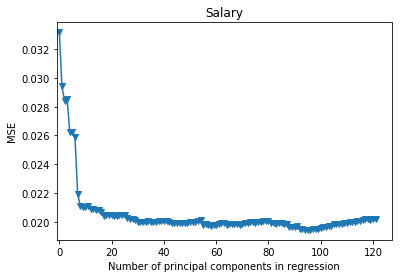

In [31]:
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [32]:
X_reduced_test = pca.transform(scale(x_test))[:,:97]
regr = LinearRegression()
regr.fit(X_red[:,:97], y_train)
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

0.01881964401002089

1.j) XGBoost model 

In [33]:
xgb_model = xgboost.XGBRegressor(reg_alpha=1,n_jobs=4)
xgb_model.fit(x_train, y_train)
y_test=pd.DataFrame(y_test)

In [34]:
y_pred = xgb_model.predict(x_test)
accuracy = xgb_model.score(x_test, y_test)
print("Accuracy:"+ str(accuracy * 100.0))

Accuracy:63.72249184837258


In [35]:
params = {'learning_rate':[0.0, 0.001, 0.005, 0.01, 0.05]}
gsearch = GridSearchCV(xgb_model,param_grid = params, cv=5)
gsearch.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
gsearch.best_score_

0.6482943720851919

In [37]:
gsearch.best_params_

{'learning_rate': 0.05}

2. Tree-Based Methods

Reading data from both training and test files

In [38]:
Training_data = pd.read_csv('aps_failure_training_set.csv',skiprows=20,na_values='na')
Test_data = pd.read_csv('aps_failure_test_set.csv',skiprows=20,na_values='na')

In [39]:
data = Training_data.append(Test_data, ignore_index=True)

2.b.i) Using data imputation for entire data

In [40]:
data=data.replace('na',np.NaN)
data.fillna(data.mean(), inplace=True)

In [41]:
Training_data=data.iloc[0:60000]
Test_data=data.iloc[60000:]

In [42]:
Training_data.to_csv('Training_data.csv', columns = Training_data.columns)

In [43]:
Test_data.to_csv('Test_data.csv', columns = Test_data.columns)

2.b.ii) CV for training set and test set

In [44]:
CV_Train=Training_data.iloc[:,1:171]
Training_CV=pd.DataFrame(columns=CV_Train.columns)
array2=[]
Training_dict={}
for i in range(0,170):
    feature=CV_Train.iloc[:,i].std()/CV_Train.iloc[:,i].mean()
    array2 = np.append(array2,feature)
    Training_dict.update({CV_Train.columns[i]:feature})
Training_CV= Training_CV.append(pd.Series(list(array2),index=CV_Train.columns),ignore_index=True)    

In [45]:
Training_CV

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,2.450938,2.297635,2.169622,193.924333,23.202587,18.670972,91.97698,34.763699,17.344552,8.544596,...,2.579055,2.558711,2.606081,2.829186,3.191612,4.962276,3.221707,5.626708,47.252412,40.498922


In [46]:
CV_Test=Test_data.iloc[:,1:171]
Test_CV=pd.DataFrame(columns=CV_Test.columns)
array2=[]
Test_dict={}
for i in range(0,170):
    feature=CV_Test.iloc[:,i].std()/CV_Test.iloc[:,i].mean()
    array2 = np.append(array2,feature)
    Test_dict.update({CV_Test.columns[i]:feature})
Test_CV= Test_CV.append(pd.Series(list(array2),index=CV_Test.columns),ignore_index=True)    

In [47]:
Test_CV

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,7.405254,1.677003,2.16037,1.717777,17.947223,16.003612,52.680695,43.197091,17.057915,9.072389,...,2.684667,2.620296,2.687163,2.943285,3.351986,4.594222,3.69976,6.190016,49.949786,57.930116


2.b.iii) Correlation matrix for training set

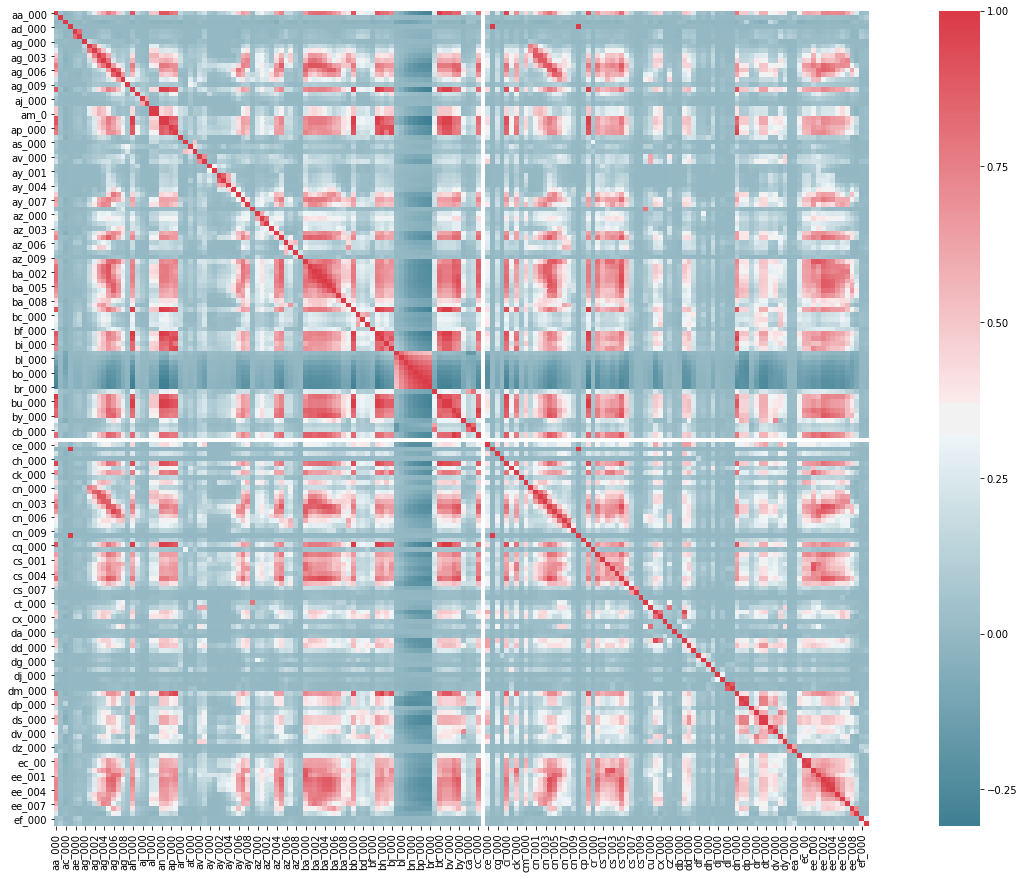

In [48]:
f, ax = plt.subplots(figsize=(25, 15))
corr = Training_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

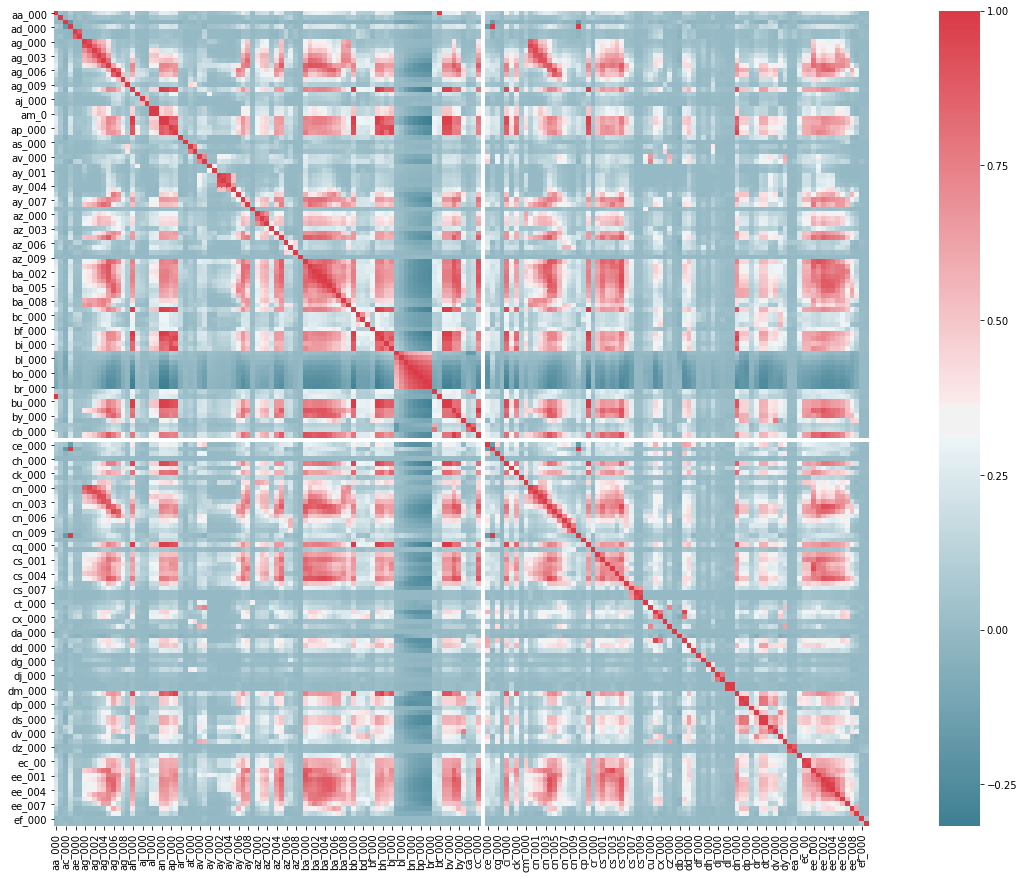

In [49]:
f, ax = plt.subplots(figsize=(25, 15))
corr = Test_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

2.b.iv) Top 13 feature with highest CV

In [50]:
Train_13={key: value for key,value in Training_dict.items() if value in nlargest(13,Training_dict.values())}
Test_13={key: value for key,value in Test_dict.items() if value in nlargest(13,Test_dict.values())}

In [51]:
Train_13

{'ad_000': 193.92433336319496,
 'ag_000': 91.97698048338566,
 'ak_000': 74.5855911285946,
 'as_000': 85.56342057329114,
 'au_000': 67.94631220846355,
 'ay_009': 83.78960830045412,
 'az_009': 77.0594504458304,
 'cf_000': 194.35326136275233,
 'ch_000': 57.88627697279238,
 'co_000': 194.0391530490907,
 'cs_009': 234.45338812778706,
 'dh_000': 115.64846213471637,
 'dj_000': 111.14849878529981}

In [52]:
Test_13

{'ag_000': 52.68069460174049,
 'ak_000': 93.41515521641949,
 'as_000': 82.90902291563049,
 'au_000': 84.93553042123239,
 'az_009': 59.1000217572831,
 'ch_000': 56.09322253971697,
 'cs_008': 62.78183247230092,
 'cs_009': 125.35907975754283,
 'df_000': 76.40236144718226,
 'dk_000': 45.99352997153798,
 'dz_000': 48.9167310161583,
 'ef_000': 49.94978581961838,
 'eg_000': 57.93011623794346}

Scatter plot for 13 features selected from CV for training and test set

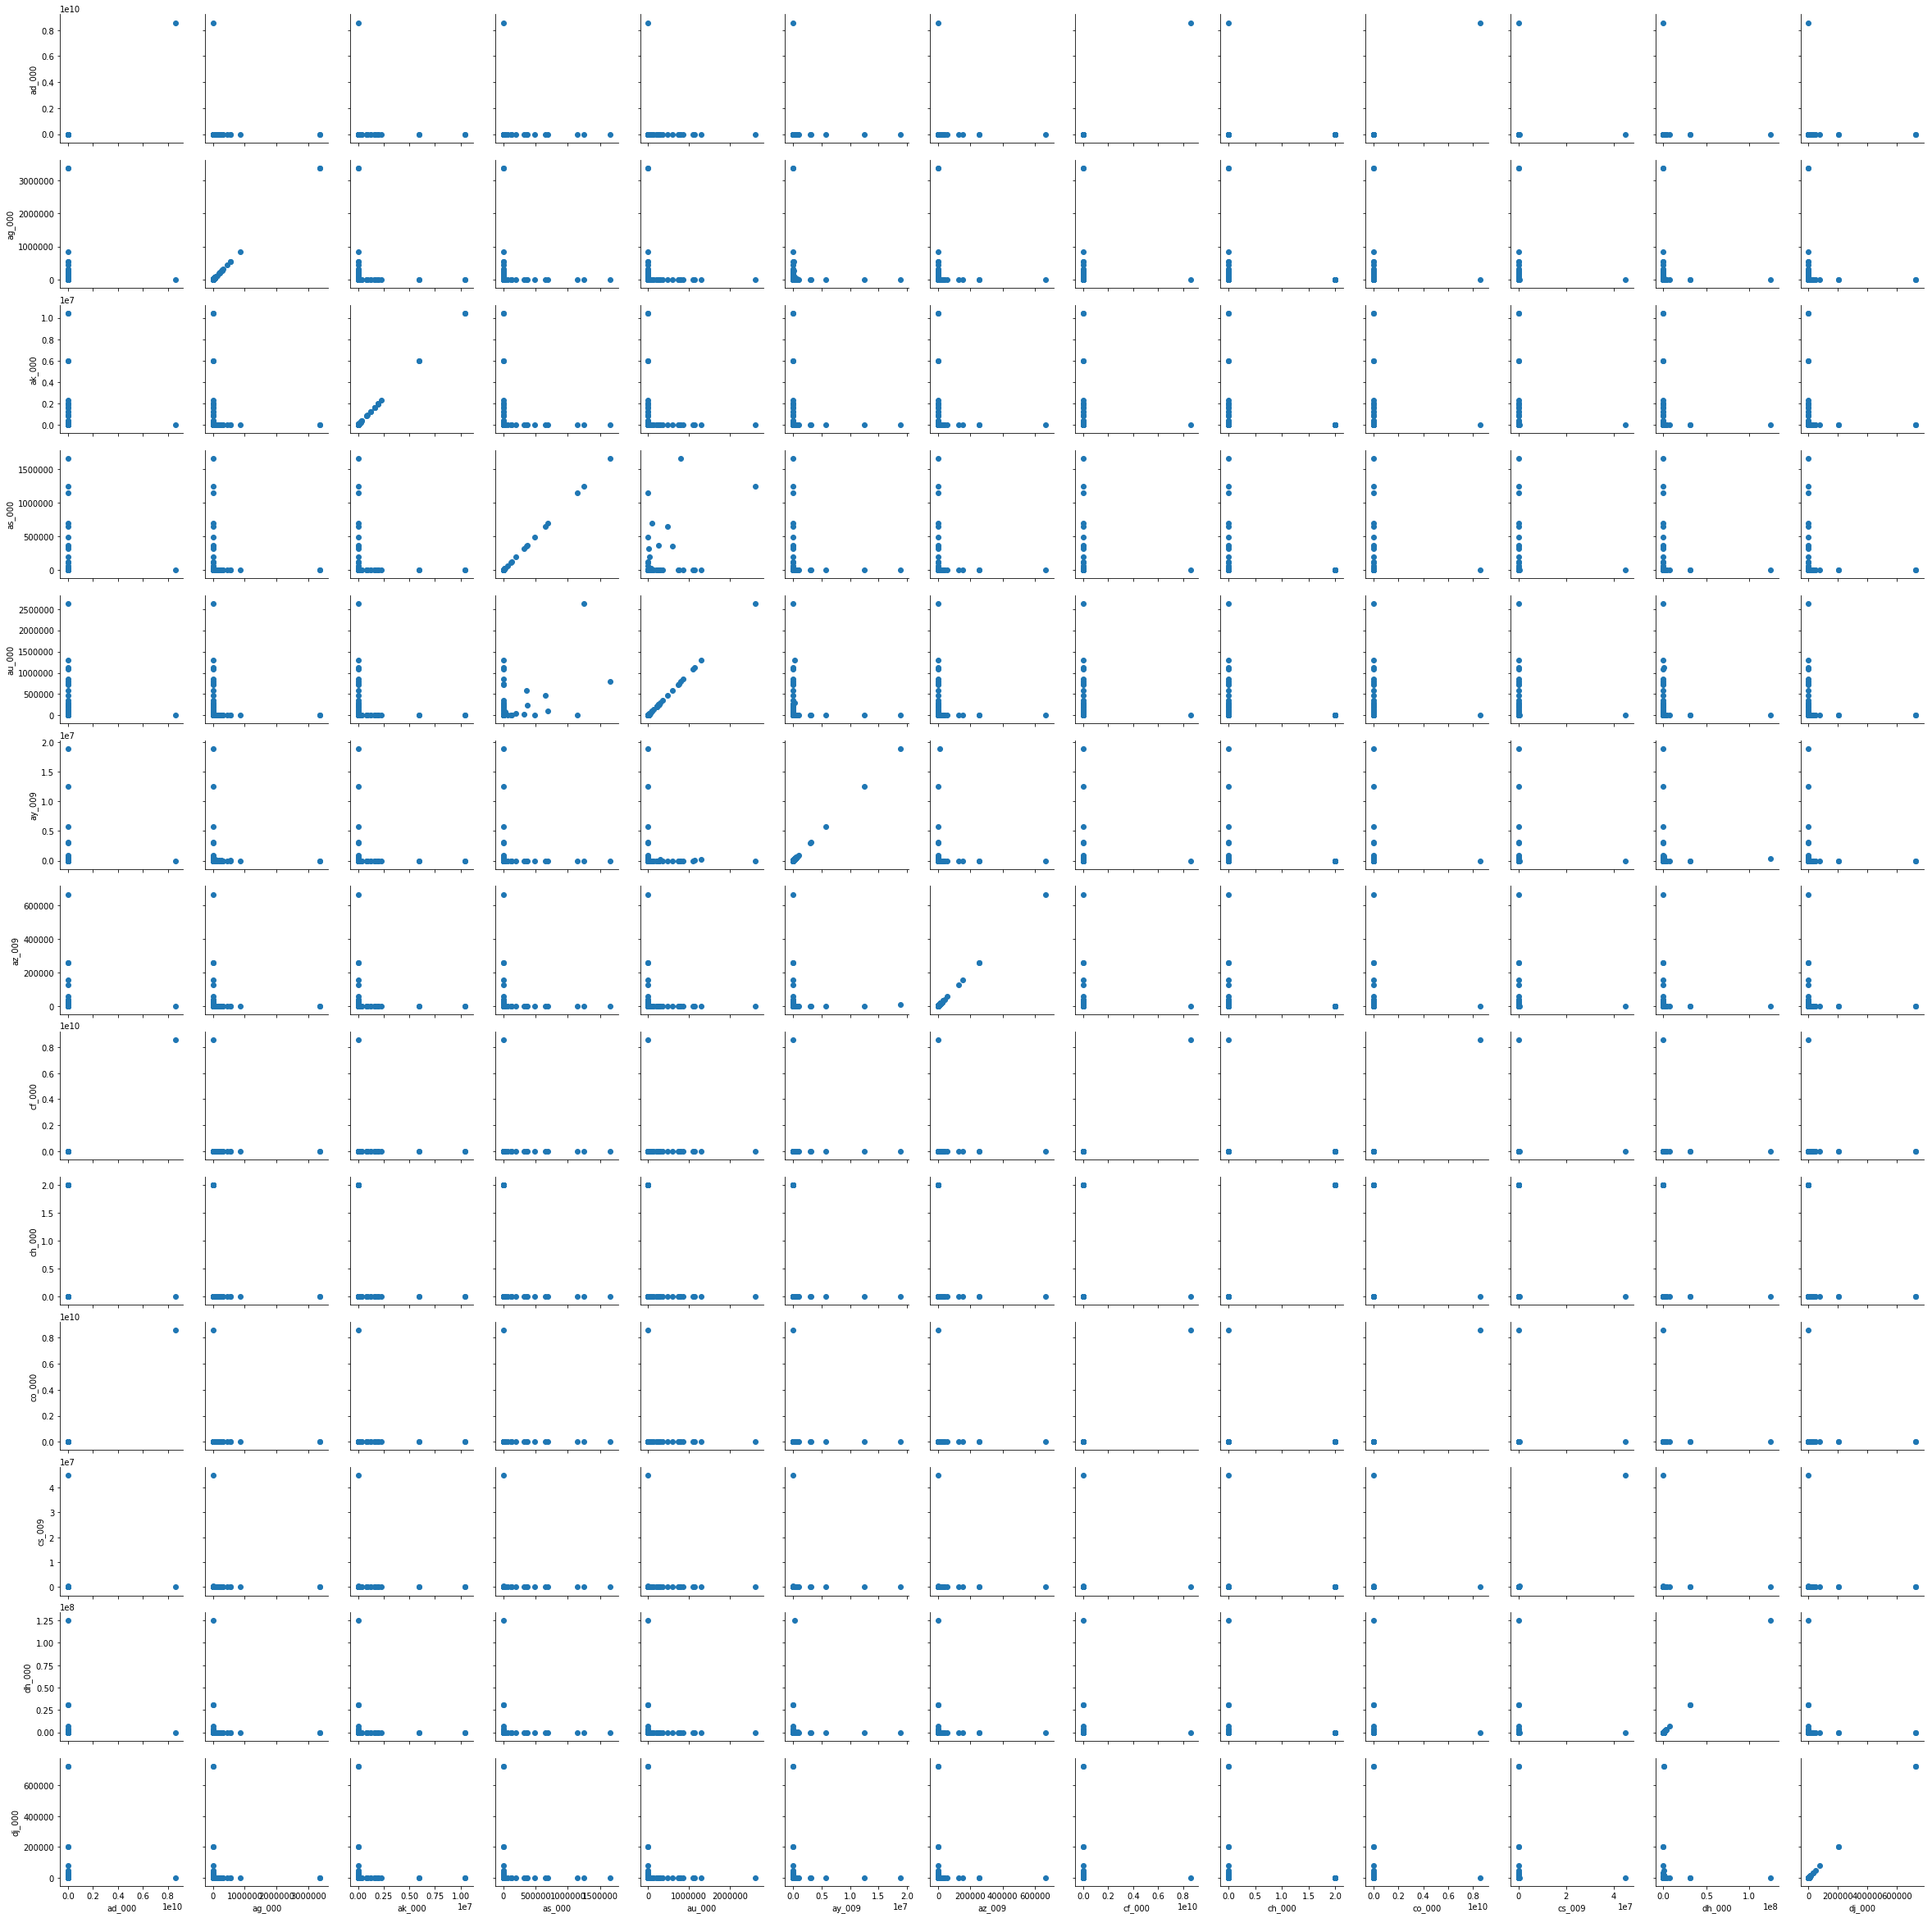

In [53]:
cols=['ad_000', 'ag_000', 'ak_000', 'as_000', 'au_000', 'ay_009', 'az_009', 'cf_000', 'ch_000', 'co_000', 'cs_009', 'dh_000', 'dj_000']
set1 = Training_data[cols]
g = sns.PairGrid(set1)
g = g.map(plt.scatter)

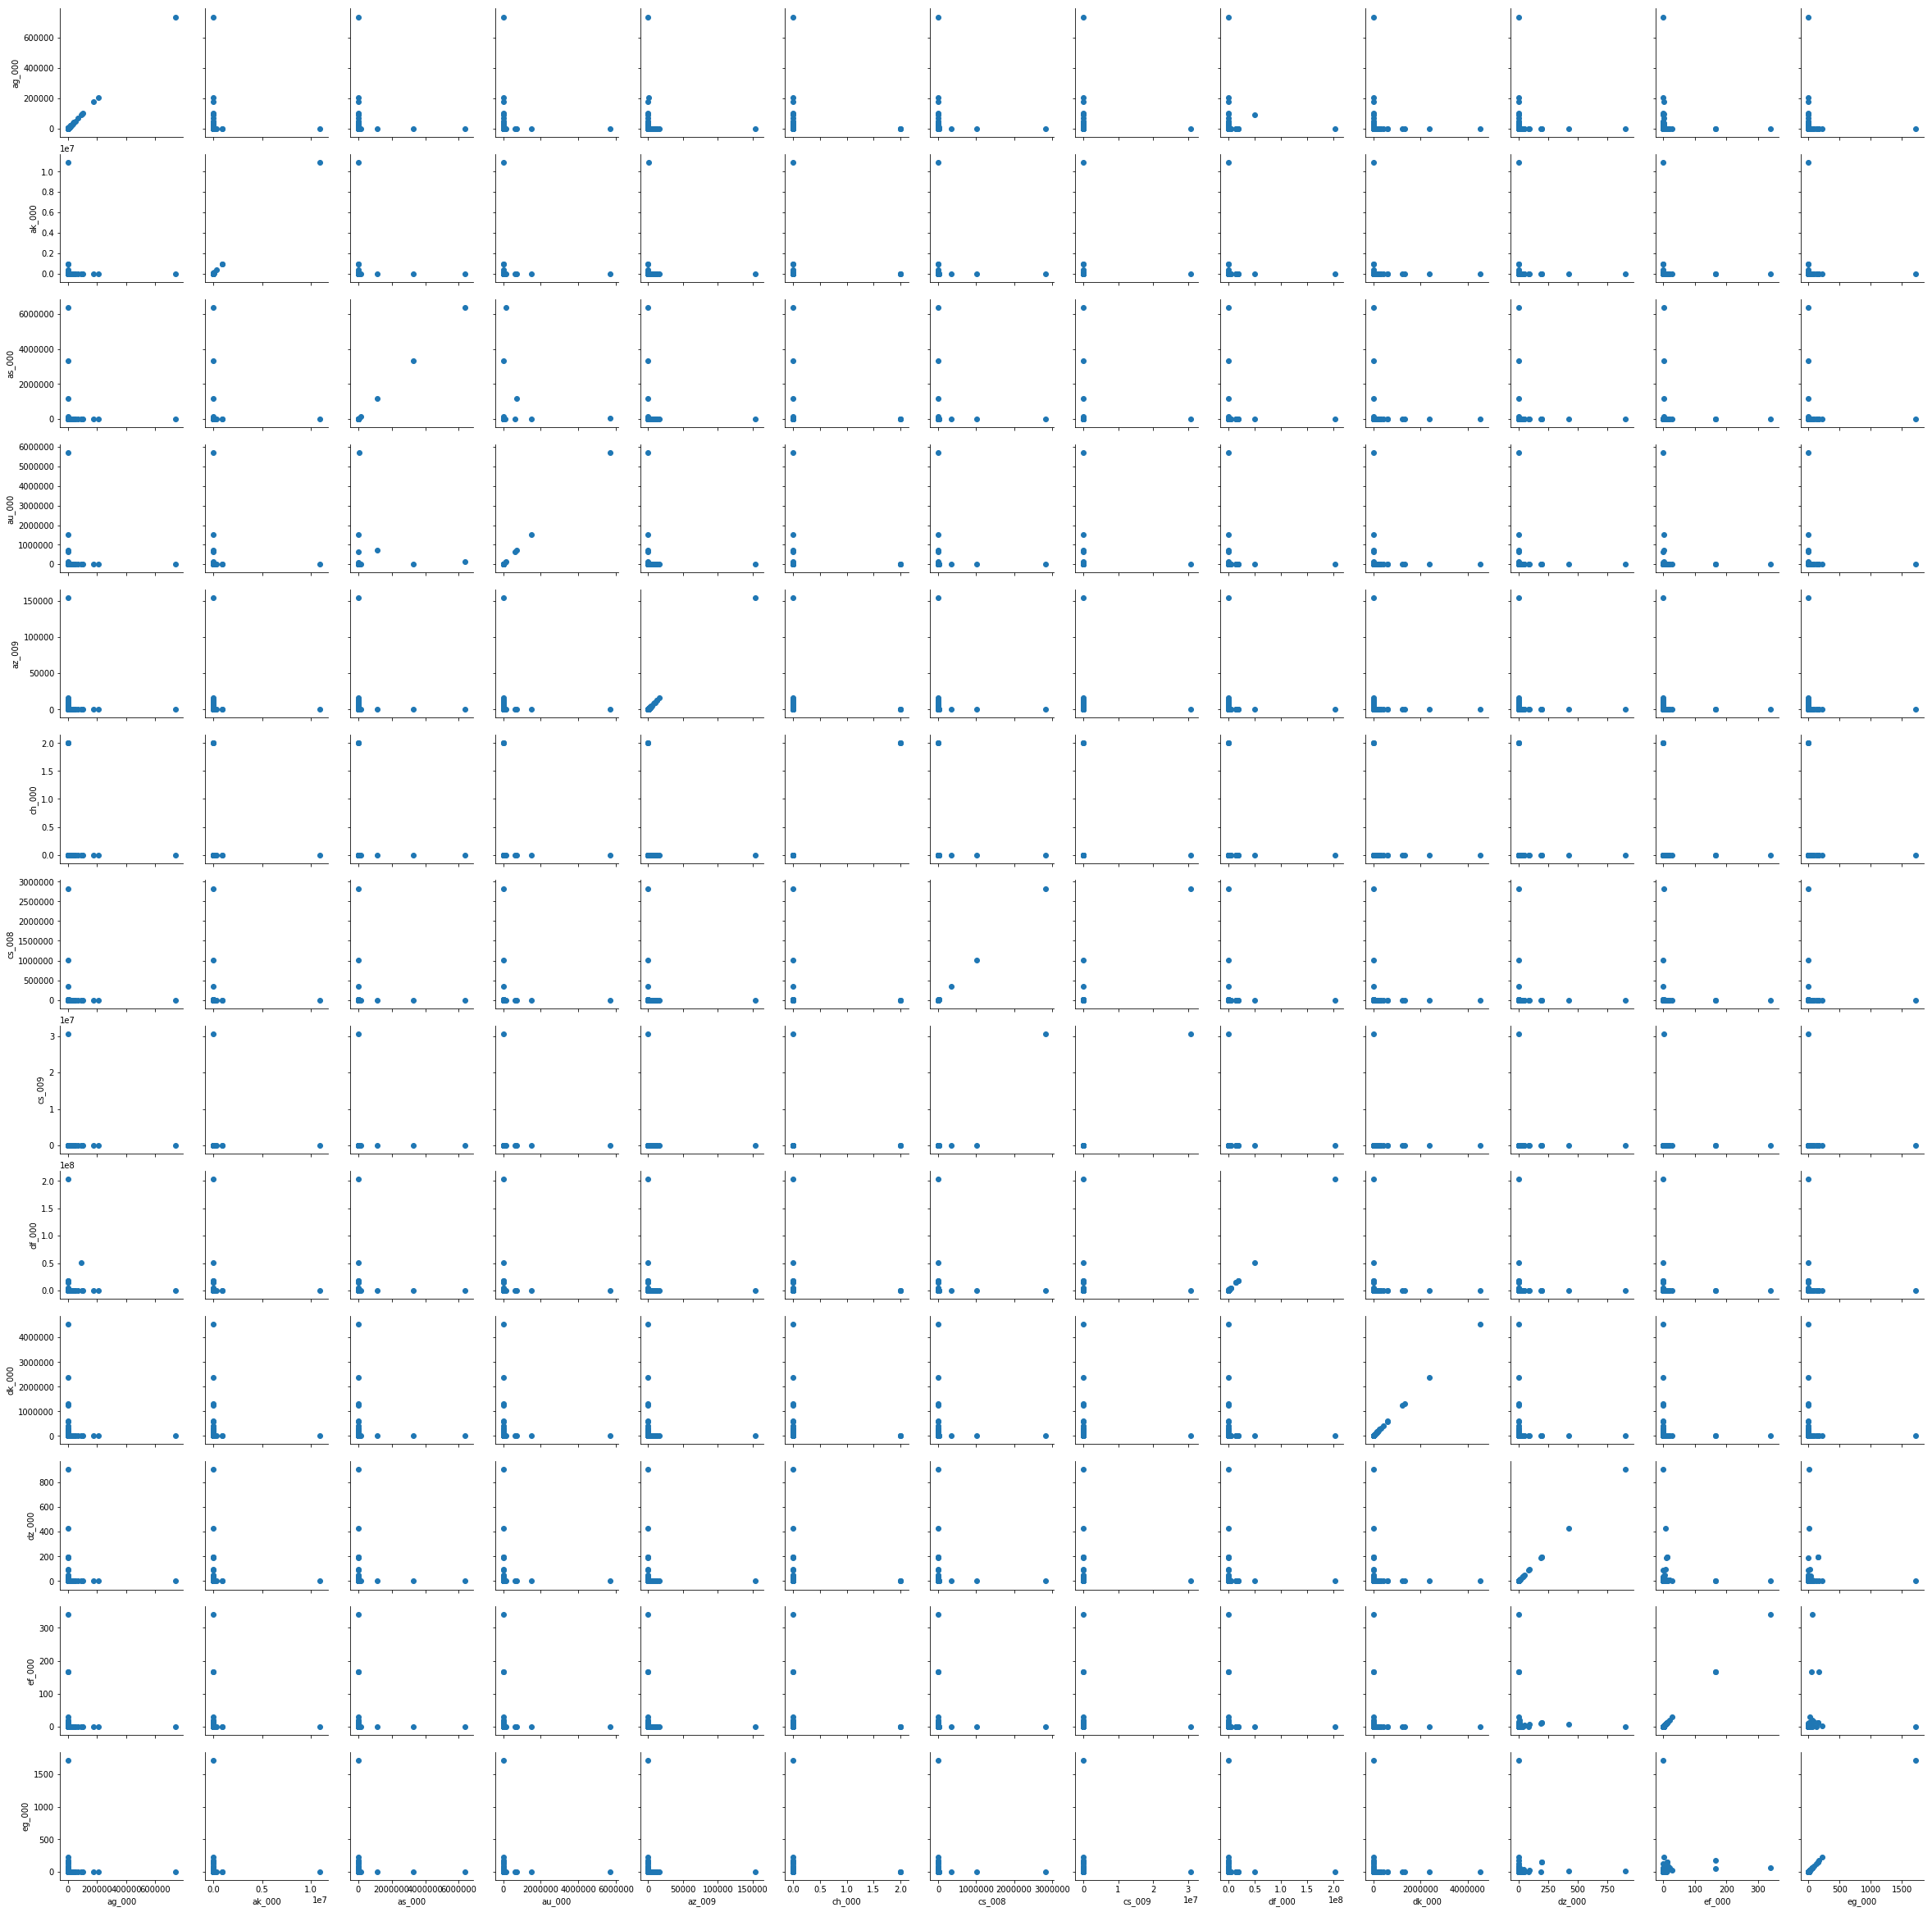

In [54]:
cols=['ag_000', 'ak_000', 'as_000', 'au_000', 'az_009', 'ch_000', 'cs_008', 'cs_009', 'df_000', 'dk_000', 'dz_000', 'ef_000', 'eg_000']
set1 = Test_data[cols]
g = sns.PairGrid(set1)
g = g.map(plt.scatter)

Box plot for training set and test set

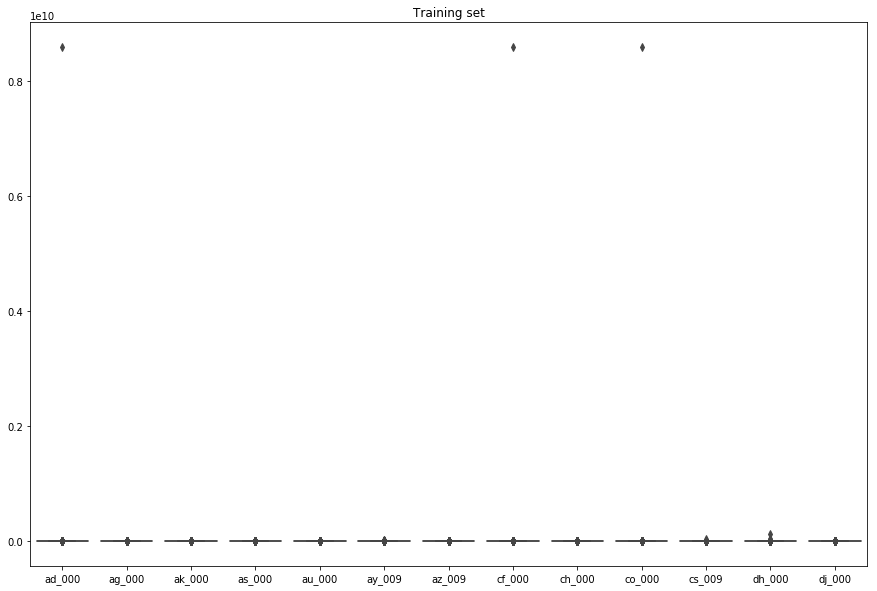

In [55]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cols=['ad_000', 'ag_000', 'ak_000', 'as_000', 'au_000', 'ay_009', 'az_009', 'cf_000', 'ch_000', 'co_000', 'cs_009', 'dh_000', 'dj_000']
set1 = Training_data[cols]
xticklablesNV = ['ad_000', 'ag_000', 'ak_000', 'as_000', 'au_000', 'ay_009', 'az_009', 'cf_000', 'ch_000', 'co_000', 'cs_009', 'dh_000', 'dj_000']
sns.boxplot(data=set1)
ax.set(title="Training set")
ax.set_xticklabels(xticklablesNV)
plt.show()

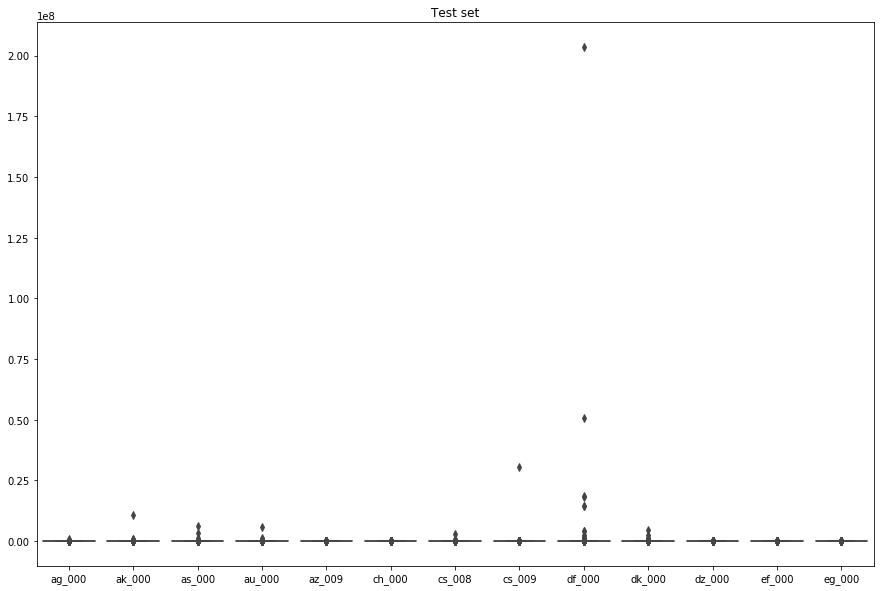

In [56]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cols=['ag_000', 'ak_000', 'as_000', 'au_000', 'az_009', 'ch_000', 'cs_008', 'cs_009', 'df_000', 'dk_000', 'dz_000', 'ef_000', 'eg_000']
set1 = Test_data[cols]
xticklablesNV = ['ag_000', 'ak_000', 'as_000', 'au_000', 'az_009', 'ch_000', 'cs_008', 'cs_009', 'df_000', 'dk_000', 'dz_000', 'ef_000', 'eg_000']
sns.boxplot(data=set1)
ax.set(title="Test set")
ax.set_xticklabels(xticklablesNV)
plt.show()

2.b.v) Number of positive data and negative data for training set respectively are:

In [57]:
print(len(Training_data[Training_data['class'] == 'pos']))
print(len(Training_data[Training_data['class'] == 'neg']))

1000
59000


Number of positive data and negative data for test set respectively are:

In [58]:
print(len(Test_data[Test_data['class'] == 'pos']))
print(len(Test_data[Test_data['class'] == 'neg']))

375
15625


In [59]:
x_train=Training_data.iloc[:,1:171]
y_train=Training_data.iloc[:,0]
x_test=Test_data.iloc[:,1:171]
y_test=Test_data.iloc[:,0]

2.c) Random forest classifier

In [60]:
clf=RandomForestClassifier(n_estimators=100,oob_score = True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9920625


In [61]:
print("Misclassfication:",1-metrics.accuracy_score(y_test, y_pred))

Misclassfication: 0.007937500000000042


In [62]:
confusion_matrix(y_test, y_pred)

array([[15605,    20],
       [  107,   268]], dtype=int64)

In [63]:
test_binary=y_test.replace({'neg':0,'pos':1})
pred_binary=y_pred
pred_binary[pred_binary == 'pos'] = 1
pred_binary[pred_binary == 'neg'] = 0
fpr, tpr, _ = metrics.roc_curve(test_binary, pred_binary)
auc = metrics.auc(fpr,tpr)
print(auc)

0.8566933333333333


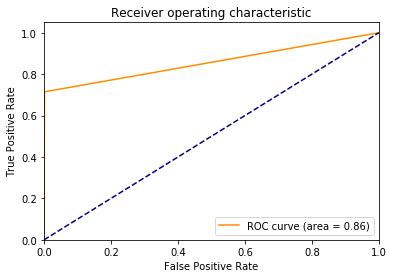

In [64]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [65]:
print(clf.oob_score_)

0.99395


In [66]:
print("Mean squared error: %.2f" % mean_squared_error(test_binary, pred_binary))

Mean squared error: 0.01


2.d) Random forest classifier accuracy for class balanced data

In [67]:
clf=RandomForestClassifier(n_estimators=100,oob_score = True,class_weight="balanced")
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9890625


In [68]:
print("Misclassfication:",1-metrics.accuracy_score(y_test, y_pred))

Misclassfication: 0.010937500000000044


In [69]:
confusion_matrix(y_test, y_pred)

array([[15609,    16],
       [  159,   216]], dtype=int64)

In [70]:
test_binary=y_test.replace({'neg':0,'pos':1})
pred_binary=y_pred
pred_binary[pred_binary == 'pos'] = 1
pred_binary[pred_binary == 'neg'] = 0
fpr, tpr, _ = metrics.roc_curve(test_binary, pred_binary)
auc = metrics.auc(fpr,tpr)
print(auc)

0.787488


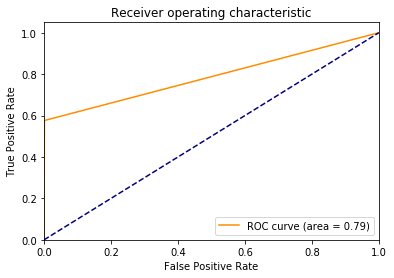

In [71]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

2.f) Creating data using SMOTE

In [72]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [73]:
Training_SMOTE=pd.DataFrame(X_train_res,columns=x_train.columns)
Training_SMOTE.insert(170,"class",y_train_res)

In [74]:
Training_SMOTE.to_csv('Training_SMOTE.csv', columns = Training_SMOTE.columns)